# 라이브러리

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
import sys
import urllib.request
from datetime import datetime, time, timedelta
import string
from tqdm import tqdm
import time as t
import seaborn as sns
from scipy.stats import pearsonr, shapiro, levene, spearmanr, ranksums, ttest_ind
import ast

In [ ]:
import matplotlib.font_manager as fm
import matplotlib as mpl

In [ ]:
# 설치된 폰트 확인
sys_font = fm.findSystemFonts()
print("sys_font number : {}".format(len(sys_font)))
print(sys_font)

nanum_font = [f for f in sys_font if 'Nanum' in f]
print("nanum_font number : {}".format(len(nanum_font))) # 나눔 폰트 없음.

sys_font number : 56
['/usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoExtraBold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareL.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf', '/usr/share/fonts/truetype/humor-sans/Hum

In [ ]:

# 나눔 폰트 업로드
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [ ]:

# 폰트가 정상적으로 설치됨.
sys_font = fm.findSystemFonts()
print("sys_font number : {}".format(len(sys_font)))

nanum_font = [f for f in sys_font if 'Nanum' in f]
print("nanum_font number : {}".format(len(nanum_font)))

sys_font number : 56
nanum_font number : 39


In [ ]:
fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', name='NanumGothic') #파일 저장되어있는 경로와 이름 설정
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) #폰트설정
mpl.rcParams['axes.unicode_minus'] = False # 그래프의 x, y축에 정상적인 - 표시 설정

In [ ]:
!pip install umap-learn

In [ ]:
from sklearn.preprocessing import RobustScaler
import umap
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# 데이터 (meta, rate, searchs, shop)

In [ ]:
meta = pd.read_csv("/content/메타_전처리1.csv")
meta = meta.drop(316)
meta = meta.drop(0)
meta = meta.loc[meta['전체회차'] >= 10].reset_index(drop = True)

rate = pd.read_csv('/content/전체시청률.csv')

In [ ]:
# 이하의 분석에서는 10화 이상의 중장편만 살펴보도록 함.
dramalist = meta.loc[meta['전체회차'] >= 10, '작품명'].tolist()

In [ ]:
# shop_standard.to_csv('shops.csv', index= False, encoding = 'utf-8-sig')
shops = pd.read_csv('/content/shops.csv')

In [ ]:
error_list_2 = ['최고의 치킨',
 '해치',
 '녹두꽃',
 '이몽',
 '아스달 연대기',
 '조선생존기',
 '레벨업',
 '신입사관 구해령',
 '꽃파당: 조선혼담공작소',
 '조선로코-녹두전',
 '나의 나라',
 '간택 - 여인들의 전쟁',
 '터치',
 '바람과 구름과 비',
 '낮과 밤',
 '바람피면 죽는다',
 '암행어사: 조선비밀수사단',
 '루카: 더 비기닝',
 '달이 뜨는 강',
 '괴물',
 '마우스',
 '어쩌다 가족',
 '나빌레라',
 '보쌈 - 운명을 훔치다',
 '멀리서 보면 푸른 봄',
 '보이스 4',
 '홍천기',
 '연모',
 '옷소매 붉은 끝동',
 '태종 이방원',
 '꽃 피면 달 생각하고',
 '킬힐',
 '돼지의 왕',
 '별똥별',
 '구필수는 없다',
 '이브',
 '클리닝 업',
 '아다마스',
 '조선 정신과 의사 유세풍',
 '블라인드',
 '트롤리',
 '미씽: 그들이 있었다 2',
 '조선 정신과 의사 유세풍 2',
 '청춘월담',
 '오아시스',
 '조선변호사',
 '악귀',
 '가슴이 뛴다']

 errors = pd.DataFrame(error_list_2, columns = ['index'])

 mean_shops = shops.iloc[:, 2:].mean()
mean_shops = pd.DataFrame(mean_shops, columns = ['mean of shops']).reset_index()
mean_shops = pd.concat([mean_shops, errors]).reset_index(drop = True).fillna(0)

In [ ]:
searchs = pd.read_csv('/content/searchs.csv')
mean_searchs = searchs.iloc[:, 2:].mean()
mean_searchs = pd.DataFrame(mean_searchs, columns = ['mean of searchs']).reset_index()

In [ ]:
avg_rate = rate.loc[rate['작품명'].isin(dramalist)].groupby('작품명').mean().reset_index()
avg_rate = avg_rate.iloc[:,:2]

<ipython-input-139-6da194019141>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_rate = rate.loc[rate['작품명'].isin(dramalist)].groupby('작품명').mean().reset_index()


# 상관관계 분석

In [ ]:
table = avg_rate.merge(mean_searchs, left_on= '작품명', right_on = 'index', how = 'left').drop('index', axis = 1)
table = table.merge(mean_shops, left_on= '작품명', right_on = 'index', how = 'left').drop('index', axis = 1)
table['mean of shops'] = np.log10(table['mean of shops'] + 0.000001)
# 작품명 / 시청률 / mean of searchs / mean of shops

## 시청률 - 일반 검색 상관관계

<ipython-input-151-c44d87039d46>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.scatterplot(x='시청률', y='mean of searchs', data=table, palette='viridis')


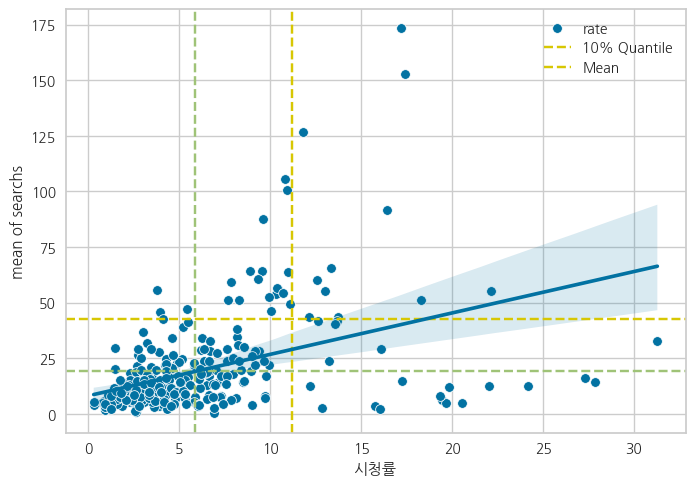

In [ ]:
# 각 열의 10% 수준에 해당하는 값과 평균 계산
quantile_10 = table[['시청률', 'mean of searchs']].quantile(0.9)
mean = table[['시청률', 'mean of searchs']].mean()

ax = sns.scatterplot(x='시청률', y='mean of searchs', data=table, palette='viridis')

# 각 열의 10% 수준에 해당하는 선 그리기
ax.axvline(x=quantile_10['시청률'], color='y', linestyle='--')
ax.axhline(y=quantile_10['mean of searchs'], color='y', linestyle='--')

# 각 열의 평균에 해당하는 선 그리기
ax.axvline(x=mean['시청률'], color='g', linestyle='--')
ax.axhline(y=mean['mean of searchs'], color='g', linestyle='--')

# 회귀선 추가하기
sns.regplot(x='시청률', y='mean of searchs', data=table, scatter=False, ax=ax, color='b')

# 범례 추가. 여기서 범례 레이블을 지정합니다.
ax.legend(labels=['rate', '10% Quantile', 'Mean'])

plt.show()


In [ ]:
x = table['시청률']
y = table['mean of searchs']
print('정규성 검정')
# 시청률에 대한 정규성 검정
stat, p_value = shapiro(x)
print('시청률 - Statistics=%.3f, p=%.3f' % (stat, p_value))

# searchs에 대한 정규성 검정
stat, p_value = shapiro(y)
print('Searchs - Statistics=%.3f, p=%.3f' % (stat, p_value))
### 두 경우 모두 정규성 만족 X ###

정규성 검정
시청률 - Statistics=0.786, p=0.000
Searchs - Statistics=0.654, p=0.000


In [ ]:
### 상관계수 검정 ###
# 피어슨 상관계수 분석
correlation, p_value = pearsonr(x, y)

print("Pearson")
print("Correlation:", correlation)
print("P-value:", p_value)

# 스피어맨 상관계수 분석
rho, p_value = spearmanr(x, y)
print("Spearman")
print('Spearman correlation: %.3f' % rho)
print('p-value: %.3f' % p_value) # 둘 모두 p.value가 충분히 작으면 유의

Pearson
Correlation: 0.42354590174813583
P-value: 6.995452897338311e-15
Spearman
Spearman correlation: 0.482
p-value: 0.000


<ipython-input-154-f71a16274ae6>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.scatterplot(x='시청률', y='mean of searchs', data=total_up_10, palette='viridis')


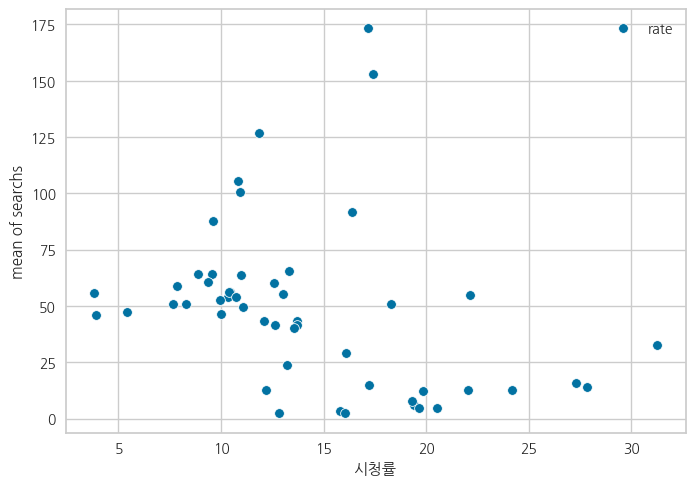

In [ ]:
total_up_10 = table.loc[(table['시청률'] > quantile_10[0]) | (table['mean of searchs'] > quantile_10[1])]


ax = sns.scatterplot(x='시청률', y='mean of searchs', data=total_up_10, palette='viridis')

# 범례 추가. 여기서 범례 레이블을 지정합니다.
ax.legend(labels=['rate', 'Mean'])

plt.show()


## 시청률 - 패션 검색 상관관계

<ipython-input-155-7254f1d62fca>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.scatterplot(x='mean of shops', y='시청률', data=table, palette='viridis')


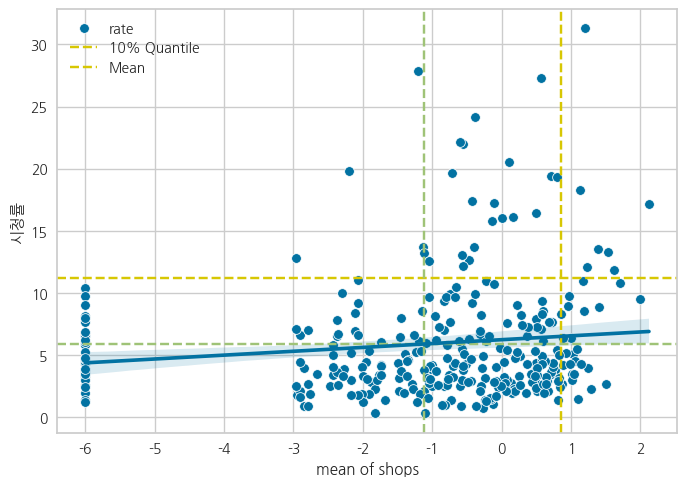

In [ ]:
# 각 열의 10% 수준에 해당하는 값과 평균 계산
quantile_10 = table[['mean of shops', '시청률']].quantile(0.9)
mean = table[['mean of shops', '시청률']].mean()

ax = sns.scatterplot(x='mean of shops', y='시청률', data=table, palette='viridis')

# 각 열의 10% 수준에 해당하는 선 그리기
ax.axvline(x=quantile_10['mean of shops'], color='y', linestyle='--')
ax.axhline(y=quantile_10['시청률'], color='y', linestyle='--')

# 각 열의 평균에 해당하는 선 그리기
ax.axvline(x=mean['mean of shops'], color='g', linestyle='--')
ax.axhline(y=mean['시청률'], color='g', linestyle='--')

# 회귀선 추가하기
sns.regplot(x='mean of shops', y='시청률', data=table, scatter=False, ax=ax, color='b')

# 범례 추가. 여기서 범례 레이블을 지정합니다.
ax.legend(labels=['rate', '10% Quantile', 'Mean'])

plt.show()


In [ ]:
x = table['시청률']
y = table['mean of shops']
print('정규성 검정')
# 시청률에 대한 정규성 검정
stat, p_value = shapiro(x)
print('시청률 - Statistics=%.3f, p=%.3f' % (stat, p_value))

# searchs에 대한 정규성 검정
stat, p_value = shapiro(y)
print('Searchs - Statistics=%.3f, p=%.3f' % (stat, p_value))
### 두 경우 모두 정규성 만족 X ###

정규성 검정
시청률 - Statistics=0.786, p=0.000
Searchs - Statistics=0.847, p=0.000


In [ ]:
### 상관계수 검정 ###
# 피어슨 상관계수 분석
correlation, p_value = pearsonr(x, y)

print("Pearson")
print("Correlation:", correlation)
print("P-value:", p_value)

# 스피어맨 상관계수 분석
rho, p_value = spearmanr(x, y)
print("Spearman")
print('Spearman correlation: %.3f' % rho)
print('p-value: %.3f' % p_value) # 둘 모두 p.value가 충분히 작으면 유의

Pearson
Correlation: 0.13306845333839895
P-value: 0.0192803513961489
Spearman
Spearman correlation: 0.113
p-value: 0.048


## 일반검색 - 패션 검색 상관관계

<ipython-input-158-e81ef3392f0e>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.scatterplot(x='mean of shops', y='mean of searchs', data=table, palette='viridis')


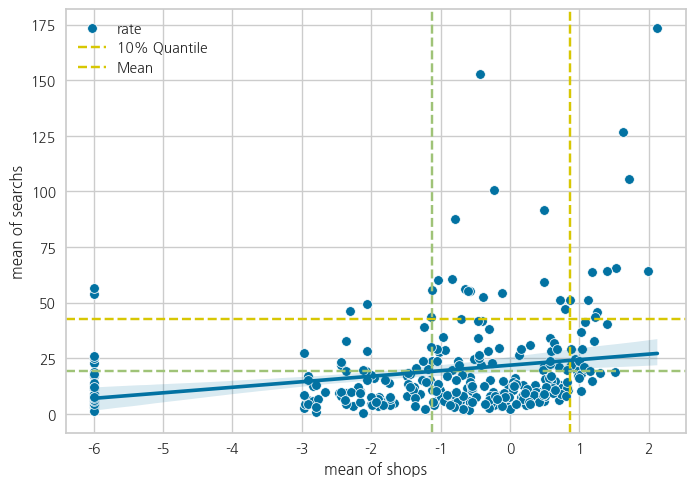

In [ ]:
# 각 열의 10% 수준에 해당하는 값과 평균 계산
quantile_10 = table[['mean of shops', 'mean of searchs']].quantile(0.9)
mean = table[['mean of shops', 'mean of searchs']].mean()

ax = sns.scatterplot(x='mean of shops', y='mean of searchs', data=table, palette='viridis')

# 각 열의 10% 수준에 해당하는 선 그리기
ax.axvline(x=quantile_10['mean of shops'], color='y', linestyle='--')
ax.axhline(y=quantile_10['mean of searchs'], color='y', linestyle='--')

# 각 열의 평균에 해당하는 선 그리기
ax.axvline(x=mean['mean of shops'], color='g', linestyle='--')
ax.axhline(y=mean['mean of searchs'], color='g', linestyle='--')

# 회귀선 추가하기
sns.regplot(x='mean of shops', y='mean of searchs', data=table, scatter=False, ax=ax, color='b')

# 범례 추가. 여기서 범례 레이블을 지정합니다.
ax.legend(labels=['rate', '10% Quantile', 'Mean'])

plt.show()


In [ ]:
x = table['mean of shops']
y = table['mean of searchs']
print('정규성 검정')

# 시청률에 대한 정규성 검정
stat, p_value = shapiro(x)
print('시청률 - Statistics=%.3f, p=%.3f' % (stat, p_value))

# searchs에 대한 정규성 검정
stat, p_value = shapiro(y)

print('Searchs - Statistics=%.3f, p=%.3f' % (stat, p_value))
### 두 경우 모두 정규성 만족 X ###

정규성 검정
시청률 - Statistics=0.847, p=0.000
Searchs - Statistics=0.654, p=0.000


In [ ]:
### 상관계수 검정 ###
# 피어슨 상관계수 분석
correlation, p_value = pearsonr(x, y)

print("Pearson")
print("Correlation:", correlation)
print("P-value:", p_value)

# 스피어맨 상관계수 분석
rho, p_value = spearmanr(x, y)
print("Spearman")
print('Spearman correlation: %.3f' % rho)
print('p-value: %.3f' % p_value) # 둘 모두 p.value가 충분히 작으면 유의

Pearson
Correlation: 0.24212289313810634
P-value: 1.6844084439267654e-05
Spearman
Spearman correlation: 0.316
p-value: 0.000


# OTT 효과

In [ ]:
netflix = ['동백꽃 필 무렵', '봄밤', '신입사관 구해령', '배가본드', '보좌관', '나의 나라', '초콜릿', '로맨스는 별책부록', '어비스',
           '아스달 연대기', '60일, 지정생존자', '사랑의 불시착', '빙의', '모두의 거짓말', '도도솔솔라라솔', '하이에나',
           '더 킹 : 영원의 군주', '이태원 클라쓰', '쌍갑포차', '우리, 사랑했을까', '사생활', '런 온', '하이바이, 마마!',
           '청춘기록', '사이코지만 괜찮아', '슬기로운 의사생활', '스타트업', '비밀의 숲 2', '루갈', '경이로운 소문',
           '도시남녀의 사랑법', '아름다웠던 우리에게', '안녕? 나야!', '연모', '라켓소년단', '그 해 우리는', '시지프스 : the myth',
           '로스쿨', '알고있지만', '너를 닮은 사람', '구경이', '결혼작사 이혼작곡', '결혼작사 이혼작곡 2', '나빌레라', '빈센조',
           '마인:MINE', '슬기로운 의사생활2', '너는 나의 봄', '갯마을 차차차', '불가살', '이 구역의 미친 X', '미남당',
           '내일', '사내맞선', '트롤리', '네가 빠진 세계', '기상청 사람들: 사내연애 잔혹사 편', '서른, 아홉','그린마더스 클럽',
           '나의 해방일지', '재벌집 막내아들', '사랑의 이해', '결혼작사 이혼작곡 3', '빨간풍선', '스물다섯 스물하나',
           '우리들의 블루스', '환혼', '작은 아씨들', '슈룹', '연예인 매니저로 살아남기', '환혼 빛과 그림자',
           '결혼백서', '어쩌다 전원일기', '구필수는 없다', '이상한 변호사 우영우', '사장님을 잠금해제', '진짜가 나타났다!',
           '신성한, 이혼', '닥터 차정숙', '나쁜 엄마', '킹더랜드', '일타 스캔들', '이번 생도 잘 부탁해', '마당이 있는 집'
           ]
# len(netflix)
# ex_list = set(dramalist)
# result = [item for item in netflix if item not in ex_list]
# result

table['ott'] = 0
table.loc[table['작품명'].isin(netflix), 'ott'] = 1

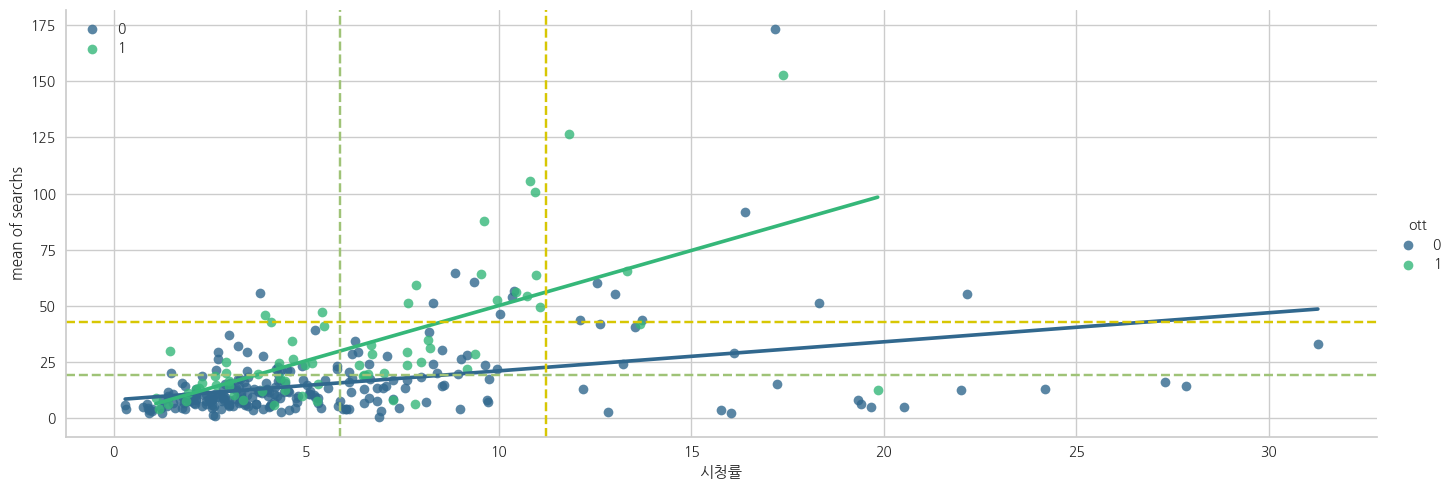

In [ ]:
### 시청률 - searchs ###
# 각 열의 10% 수준에 해당하는 값과 평균 계산
quantile_10 = table[['시청률', 'mean of searchs']].quantile(0.9)
mean = table[['시청률', 'mean of searchs']].mean()

# hue에 따른 회귀선 그리기
lm = sns.lmplot(x='시청률', y='mean of searchs', hue='ott', data=table, palette='viridis', height=5, aspect=14/5, ci = None)

# 각 열의 10% 수준에 해당하는 선 그리기
lm.ax.axvline(x=quantile_10['시청률'], color='y', linestyle='--')
lm.ax.axhline(y=quantile_10['mean of searchs'], color='y', linestyle='--')

# 각 열의 평균에 해당하는 선 그리기
lm.ax.axvline(x=mean['시청률'], color='g', linestyle='--')
lm.ax.axhline(y=mean['mean of searchs'], color='g', linestyle='--')


plt.legend(loc='upper left')
plt.show()


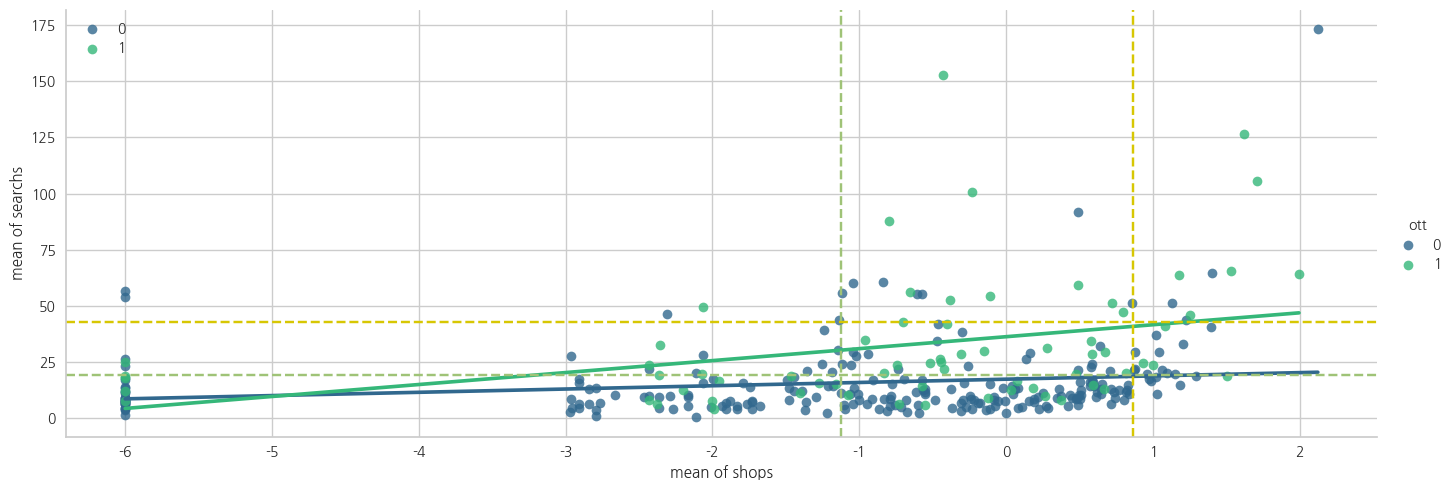

In [ ]:
### shops - searachs ###
# 각 열의 10% 수준에 해당하는 값과 평균 계산
quantile_10 = table[['mean of shops', 'mean of searchs']].quantile(0.9)
mean = table[['mean of shops', 'mean of searchs']].mean()

# hue에 따른 회귀선 그리기
lm = sns.lmplot(x='mean of shops', y='mean of searchs', hue='ott', data=table, palette='viridis', height=5, aspect=14/5, ci = None)

# 각 열의 10% 수준에 해당하는 선 그리기
lm.ax.axvline(x=quantile_10['mean of shops'], color='y', linestyle='--')
lm.ax.axhline(y=quantile_10['mean of searchs'], color='y', linestyle='--')

# 각 열의 평균에 해당하는 선 그리기
lm.ax.axvline(x=mean['mean of shops'], color='g', linestyle='--')
lm.ax.axhline(y=mean['mean of searchs'], color='g', linestyle='--')


plt.legend(loc='upper left')
plt.show()


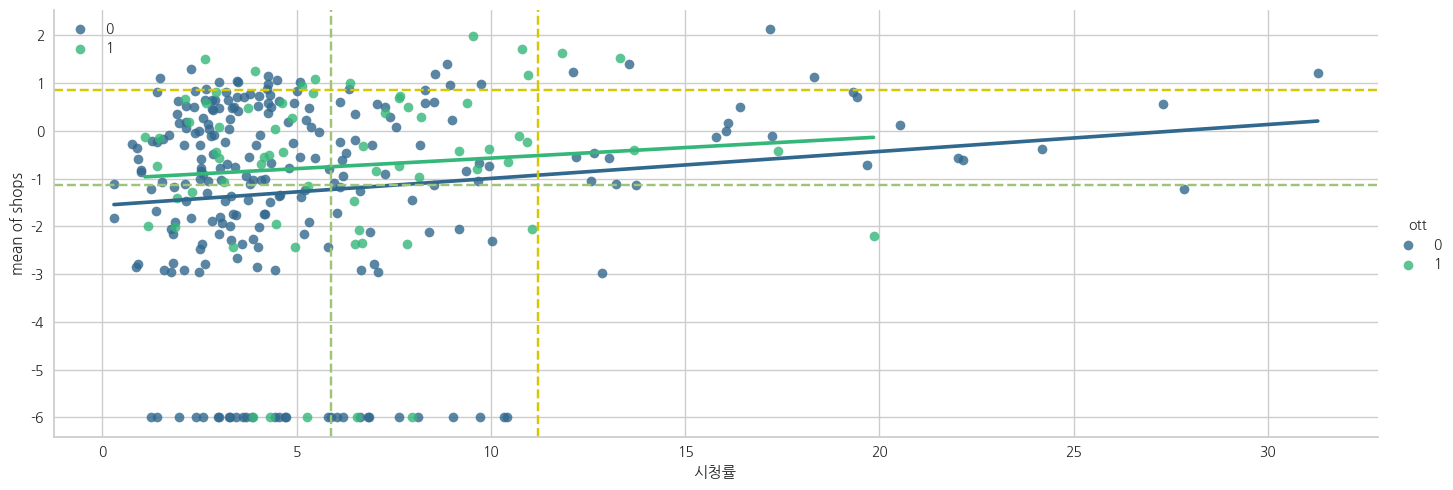

In [ ]:
### 시청률 - shops ###
# 각 열의 10% 수준에 해당하는 값과 평균 계산
quantile_10 = table[['시청률', 'mean of shops']].quantile(0.9)
mean = table[['시청률', 'mean of shops']].mean()

# hue에 따른 회귀선 그리기
lm = sns.lmplot(x='시청률', y='mean of shops', hue='ott', data=table, palette='viridis', height=5, aspect=14/5, ci = None)

# 각 열의 10% 수준에 해당하는 선 그리기
lm.ax.axvline(x=quantile_10['시청률'], color='y', linestyle='--')
lm.ax.axhline(y=quantile_10['mean of shops'], color='y', linestyle='--')

# 각 열의 평균에 해당하는 선 그리기
lm.ax.axvline(x=mean['시청률'], color='g', linestyle='--')
lm.ax.axhline(y=mean['mean of shops'], color='g', linestyle='--')


plt.legend(loc='upper left')
plt.show()


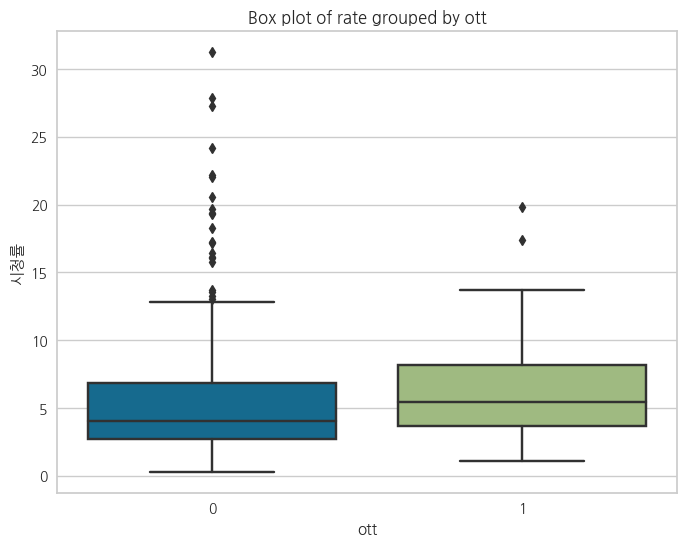

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='ott', y='시청률', data=table)
plt.title('Box plot of rate grouped by ott')
plt.show()

In [ ]:
## 시청률의 경우 차이가 있는가? ##
x = table.loc[table['ott'] == 0, '시청률']
y = table.loc[table['ott'] == 1, '시청률']

# 시청률에 대한 정규성 검정
stat, p_value = shapiro(x)
print('Ott X 정규성 - Statistics=%.3f, p=%.3f' % (stat, p_value))

# searchs에 대한 정규성 검정
stat, p_value = shapiro(y)
print('Ott 정규성 - Statistics=%.3f, p=%.3f' % (stat, p_value))
### 두 경우 모두 정규성 만족 X ###

t_stat, p_val = ttest_ind(x, y, equal_var = False)
print('t-statistic=%.3f, p-value=%.3f' % (t_stat, p_val))

stat, p = ranksums(x, y)

print('Wilcoxon Statistics=%.3f, p=%.3f' % (stat, p))
## ott 여부는 시청률에 영향을 주지 않는다. ##

Ott X 정규성 - Statistics=0.748, p=0.000
Ott 정규성 - Statistics=0.926, p=0.001
t-statistic=-1.126, p-value=0.262
Wilcoxon Statistics=-2.567, p=0.010


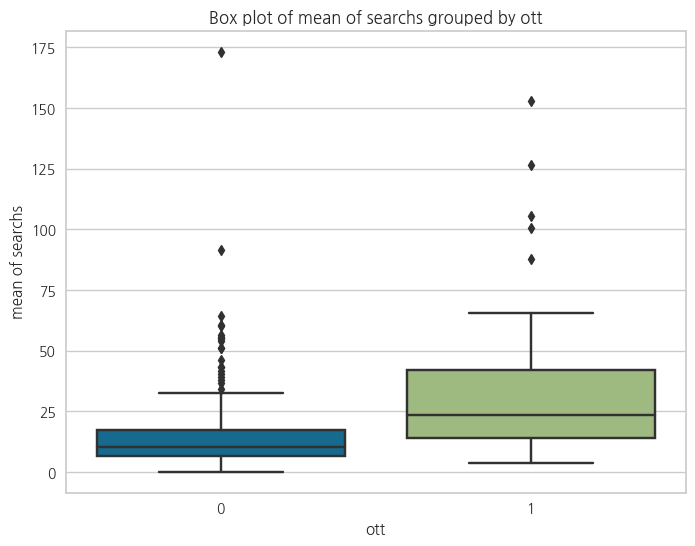

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='ott', y='mean of searchs', data=table)
plt.title('Box plot of mean of searchs grouped by ott')
plt.show()

In [ ]:
## 일반 검색의 경우 차이가 있는가? ##
x = table.loc[table['ott'] == 0, 'mean of searchs']
y = table.loc[table['ott'] == 1, 'mean of searchs']

# 시청률에 대한 정규성 검정
stat, p_value = shapiro(x)
print('Ott X 정규성 - Statistics=%.3f, p=%.3f' % (stat, p_value))

# searchs에 대한 정규성 검정
stat, p_value = shapiro(y)
print('Ott 정규성 - Statistics=%.3f, p=%.3f' % (stat, p_value))
### 두 경우 모두 정규성 만족 X ###

t_stat, p_val = ttest_ind(x, y, equal_var = False)
print('t-statistic=%.3f, p-value=%.3f' % (t_stat, p_val))

stat, p = ranksums(x, y)

print('Wilcoxon Statistics=%.3f, p=%.3f' % (stat, p))
## ott 여부는 일반 검색량에 영향을 준다. ##

Ott X 정규성 - Statistics=0.615, p=0.000
Ott 정규성 - Statistics=0.774, p=0.000
t-statistic=-4.580, p-value=0.000
Wilcoxon Statistics=-6.380, p=0.000


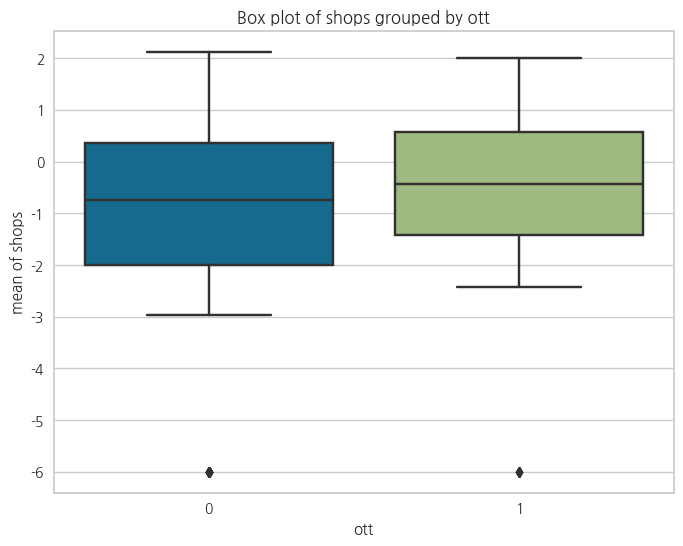

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='ott', y='mean of shops', data=table)
plt.title('Box plot of shops grouped by ott')
plt.show()

In [ ]:
## 쇼핑 검색의 경우 차이가 있는가? ##
x = table.loc[table['ott'] == 0, 'mean of shops']
y = table.loc[table['ott'] == 1, 'mean of shops']

# 시청률에 대한 정규성 검정
stat, p_value = shapiro(x)
print('Ott X 정규성 - Statistics=%.3f, p=%.3f' % (stat, p_value))

# searchs에 대한 정규성 검정
stat, p_value = shapiro(y)
print('Ott 정규성 - Statistics=%.3f, p=%.3f' % (stat, p_value))
### 두 경우 모두 정규성 만족 X ###

t_stat, p_val = ttest_ind(x, y, equal_var = False)
print('t-statistic=%.3f, p-value=%.3f' % (t_stat, p_val))

stat, p = ranksums(x, y)

print('Wilcoxon Statistics=%.3f, p=%.3f' % (stat, p))
## ott 여부는 쇼핑 검색량에 영향을 주지않는다. ##

Ott X 정규성 - Statistics=0.843, p=0.000
Ott 정규성 - Statistics=0.854, p=0.000
t-statistic=-1.906, p-value=0.059
Wilcoxon Statistics=-1.743, p=0.081


# 쇼핑 검색에 영향을 미치는 요인

## 시간대의 영향

In [ ]:
time_rate = pd.merge(avg_rate, meta[['작품명', '시작시간']])
time_rate.loc[time_rate['시작시간'] == '22:30', '시작시간'] = '10:30'
time_rate['시작시간'] = pd.to_datetime(time_rate['시작시간'], format = '%H:%M').dt.time

In [ ]:
time_rate['시작시간'].unique()

array([datetime.time(9, 0), datetime.time(9, 35), datetime.time(8, 55),
       datetime.time(9, 30), datetime.time(10, 0), datetime.time(10, 30),
       datetime.time(9, 45), datetime.time(11, 0), datetime.time(9, 10),
       datetime.time(10, 50), datetime.time(9, 50), datetime.time(9, 25),
       datetime.time(9, 20), datetime.time(8, 30), datetime.time(10, 31),
       datetime.time(9, 40), datetime.time(10, 32), datetime.time(9, 5),
       datetime.time(7, 5), datetime.time(9, 12), datetime.time(10, 35),
       datetime.time(8, 50), datetime.time(10, 40), datetime.time(10, 20),
       datetime.time(9, 16), datetime.time(8, 5), datetime.time(9, 15),
       datetime.time(7, 55), datetime.time(9, 53), datetime.time(7, 10),
       datetime.time(11, 20), datetime.time(8, 40), datetime.time(11, 10)],
      dtype=object)

In [ ]:
# time_rate['시간대'] = 0
# time_rate.loc[time_rate['시작시간'] < time(7, 30), '시간대'] = 'time1'
# time_rate.loc[(time_rate['시작시간'] >= time(7, 30)) & (time_rate['시작시간'] < time(8, 30)), '시간대'] = 'time2'
# time_rate.loc[(time_rate['시작시간'] >= time(8, 30)) & (time_rate['시작시간'] < time(9, 30)), '시간대'] = 'time3'
# time_rate.loc[(time_rate['시작시간'] >= time(9, 30)) & (time_rate['시작시간'] < time(10, 30)), '시간대'] = 'time4'
# time_rate.loc[(time_rate['시작시간'] >= time(10, 30)), '시간대'] = 'time5'
# time_rate.groupby('시간대').mean()['시청률']

In [ ]:
time_rate['시간대'] = 0
time_rate.loc[time_rate['시작시간'] < time(8, 00), '시간대'] = 'time1'
time_rate.loc[(time_rate['시작시간'] >= time(8, 00)) & (time_rate['시작시간'] < time(9, 00)), '시간대'] = 'time2'
time_rate.loc[(time_rate['시작시간'] >= time(9, 00)) & (time_rate['시작시간'] < time(10, 00)), '시간대'] = 'time3'
time_rate.loc[(time_rate['시작시간'] >= time(10, 00)) & (time_rate['시작시간'] < time(11, 00)), '시간대'] = 'time4'
time_rate.loc[(time_rate['시작시간'] >= time(11, 00)), '시간대'] = 'time5'
time_rate.groupby('시간대').mean()['시청률']

<ipython-input-174-a0b8437b358d>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  time_rate.groupby('시간대').mean()['시청률']


시간대
time1    12.870113
time2    10.232240
time3     5.235876
time4     5.639705
time5     2.383808
Name: 시청률, dtype: float64

In [ ]:
# time_rate['시간대'] = 0
# time_rate.loc[time_rate['시작시간'] < time(7, 50), '시간대'] = 'time1'
# time_rate.loc[(time_rate['시작시간'] >= time(7, 50)) & (time_rate['시작시간'] < time(8, 50)), '시간대'] = 'time2'
# time_rate.loc[(time_rate['시작시간'] >= time(8, 50)) & (time_rate['시작시간'] < time(9, 50)), '시간대'] = 'time3'
# time_rate.loc[(time_rate['시작시간'] >= time(9, 50)) & (time_rate['시작시간'] < time(10, 50)), '시간대'] = 'time4'
# time_rate.loc[(time_rate['시작시간'] >= time(10, 50)), '시간대'] = 'time5'
# time_rate.groupby('시간대').mean()['시청률']

In [ ]:
## 시청률의 경우 차이가 있는가? ##
x = time_rate.loc[time_rate['시간대'] == 'time2', '시청률']
y = time_rate.loc[time_rate['시간대'] == 'time3', '시청률']

# 시청률에 대한 정규성 검정
stat, p_value = shapiro(x)
print('time 2 정규성 - Statistics=%.3f, p=%.3f' % (stat, p_value))

# searchs에 대한 정규성 검정
stat, p_value = shapiro(y)
print('time 3 정규성 - Statistics=%.3f, p=%.3f' % (stat, p_value))
### 두 경우 모두 정규성 만족 X ###

t_stat, p_val = ttest_ind(x, y)
print('t-statistic=%.3f, p-value=%.3f' % (t_stat, p_val))

stat, p = ranksums(x, y)

print('Wilcoxon Statistics=%.3f, p=%.3f' % (stat, p))
## 시간대가 시청률에 유의미한 영향을 미친다. ##

time 2 정규성 - Statistics=0.808, p=0.000
time 3 정규성 - Statistics=0.926, p=0.000
t-statistic=5.556, p-value=0.000
Wilcoxon Statistics=2.753, p=0.006


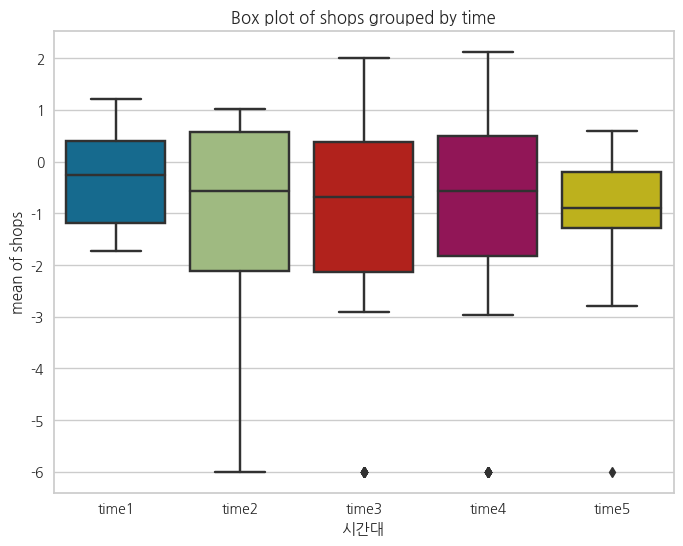

In [ ]:
table = pd.merge(table, time_rate[['작품명', '시간대']])

plt.figure(figsize=(8, 6))
order = ['time1','time2', 'time3', 'time4', 'time5']
sns.boxplot(x='시간대', y='mean of shops', data=table, order = order)
plt.title('Box plot of shops grouped by time')
plt.show()

In [ ]:
## 시청률의 경우 차이가 있는가? ##
x = table.loc[table['시간대'] == 'time2', 'mean of shops']
y = table.loc[table['시간대'] == 'time3', 'mean of shops']

# 시청률에 대한 정규성 검정
stat, p_value = shapiro(x)
print('time 2 정규성 - Statistics=%.3f, p=%.3f' % (stat, p_value))

# searchs에 대한 정규성 검정
stat, p_value = shapiro(y)
print('time 3 정규성 - Statistics=%.3f, p=%.3f' % (stat, p_value))
### 두 경우 모두 정규성 만족 X ###

t_stat, p_val = ttest_ind(x, y)
print('t-statistic=%.3f, p-value=%.3f' % (t_stat, p_val))

stat, p = ranksums(x, y)

print('Wilcoxon Statistics=%.3f, p=%.3f' % (stat, p))
## 시간대가 쇼핑 검색량에 유의미한 영향을 미치지 않는다. ##

time 2 정규성 - Statistics=0.835, p=0.001
time 3 정규성 - Statistics=0.860, p=0.000
t-statistic=0.070, p-value=0.944
Wilcoxon Statistics=0.072, p=0.943


## 장르가 영향을 미치나?

In [ ]:
all_genres = []

for genres_str in meta['장르']:
    # 문자열을 파싱하여 리스트로 변환
    genres_list = ast.literal_eval(genres_str)

    # 각 장르에 대해 공백 제거
    genres_list = [genre.strip() for genre in genres_list]

    all_genres.extend(genres_list)

# set을 사용해 중복 제거 후 다시 list로 변환
unique_genres = list(set(all_genres))

print(unique_genres)

['블랙 코미디', '오피스', '판타지', '로맨스', '첩보', '경찰', '케이퍼', '어드벤처', '일상', '대학', '형사', '재난', '사극', '코믹', '코믹 미스터리 사극 드라마', '비즈니스', '미스터리 멜로', '서스펜스', 'SF', '낭만', '학원물 로맨스', '뷰티', '예능 드라마', '휴먼 판타지 드라마', '법률 드라마', '로맨틱 코미디 드라마', '느와르', '금융', '뮤지컬', '스릴러', '디스토피아', '재벌', '미스터리', '심리 스릴러', '판타지 로코 드라마', '막장 드라마', '휴머니즘', '호러', '가족', '형사물', '법정', '추리물', '액션', '방송/연예', '회귀', '초능력', '시트콤', '판타지 사극', '심리', '프라이빗 오피스 멜로', '로코', '미스터리 스릴러', '밀리터리 스릴러', '모험', '로맨틱 코미디', '성장', '학원', '의학', '드라마', '음악 드라마', '메디컬', '판타지힐링', '미스터리 수사물', '하이틴', '일상물', '회사 드라마', '로맨틱 판타지', '교육', '서스펜스 멜로', '경제', '논픽션', '학교', '좀비 아포칼립스', '연속극', '청춘 성장', '막장', '로맨스 드라마', '현대 판타지', '추적활극', '로맨틱 드라마[1] 로맨틱 코미디[2]', '블록버스터', '스포츠 드라마', '웹드라마', '힐링', '로맨틱', '감성', '격정멜로', '[1] 로맨스', '하드보일드', '판타지 액션 로맨스', '코미디', '우정', '수사', '서스펜스 추리', '타임 크로싱', '공포', '좀비', '휴먼', '정치', '법률', '복수', '클래식', '판타지 드라마', '군대', '스포츠', '피카레스크', '오컬트', '시대극', '엑소시즘', '추리', '미스테리', '한의학', '멜로 로맨스 코미디', '멜로', '캠퍼스', '청춘 드라마', '블랙코미디', '청춘', '범죄', '음악']


In [ ]:
genre_groups = {
    '코미디' : ['예능', '코믹', '코미디', '시트콤'],
    '멜로' : ['멜로', '로맨틱', '로맨스'],
    '로코' : ['로맨틱 코미디', '로코'],
    '액션' : ['액션', '모험', '추적활극', '어드벤처', '블록버스터'],
    '메디컬' : ['메디컬', '한의학', '의학'],
    '판타지' : ['판타지', '판타지 드라마', '회귀', '판타지 힐링', '초능력'],
    '오피스' : ['방송/연예', '오피스', '비즈니스', '회사'],
    '추리' : ['미스터리 수사물', '서스펜스 추리', '수사', '경찰','형사', '심리'],
    '법정' : ['법률', '법정'],
    '정치' : ['경제', '금융', '정치', '재벌'],
    '오컬트' : ['좀비', '좀비 아포칼립스', '오컬트', '호러', '디스토피아', '엑소시즘', '공포'],
    '휴머니즘' : ['일상', '음악', '가족', '힐링', '우정', '휴먼', '휴머니즘'],
    '막장' : ['막장'],
    'SF' : ['SF', '타임 크로싱'],
    '스릴러' : ['범죄', '하드보일드', '피카레스크','스릴러', '미스터리', '서스펜스', '첩보', '케이퍼'],
    '사극' : ['사극', '시대극'],
    '10대' : ['학교', '스포츠', '학원', '청춘', '캠퍼스', '웹드라마', '우정', '하이틴', '성장', '대학'],
    '복수' : ['복수'],
    '블랙 코미디' : ['블랙코미디', '블랙 코미디']
}

In [ ]:
meta_genre = meta.iloc[:, :2]

In [ ]:
# 새로운 DataFrame 생성
one_hot_encoding = pd.DataFrame()

# 각 장르 그룹을 순회하며 키워드에 해당하는 열 생성
for keyword, values in genre_groups.items():
    one_hot_encoding[keyword] = 0
    for genre in values:
        one_hot_encoding[keyword] = one_hot_encoding[keyword] | meta_genre['장르'].apply(lambda x: genre in str(x))
    one_hot_encoding[keyword] = one_hot_encoding[keyword].astype(int)  # True/False를 1/0으로 변환

# 결과 DataFrame과 원래 DataFrame 병합
genre = pd.concat([meta_genre['작품명'], one_hot_encoding], axis=1)

In [ ]:
genre.loc[genre['로코'] == 1, ['멜로', '코미디']] = 1
genre.drop(columns=['로코'], inplace=True)

# 블랙코미디가 1이면 코미디는 0
genre.loc[genre['블랙 코미디'] == 1, '코미디'] = 0


In [ ]:
genre_table = pd.merge(table.iloc[:,:2], genre)

## 배우 등급 평가

### 그레이딩 과정

In [ ]:
actor_brand_d = pd.read_csv("/content/배우브랜드.csv")

In [ ]:
actor_names = actor_brand_d['브랜드'].unique()
periods = actor_brand_d['기간'].unique()
actor_brand_d_z = actor_brand_d.copy()
actor_brand_d_z['z_score'] = np.nan # z score 열을 추가

actor_brand_d_z['relative_score'] = np.nan

for period in list(periods):
    period_data = actor_brand_d_z.loc[actor_brand_d_z['기간']==period,:].copy()
    p_data = period_data['브랜드평판지수'].copy()
    actor_brand_d_z.loc[actor_brand_d_z['기간']==period,'z_score'] =\
                            (p_data - np.mean(p_data)) / np.std(p_data)

actor_brand_d_z.loc[5<=actor_brand_d_z['z_score'], 'relative_score'] = 31
actor_brand_d_z.loc[(4<=actor_brand_d_z['z_score'])&(actor_brand_d_z['z_score']<5),
                                                    'relative_score'] = 25
actor_brand_d_z.loc[(3<=actor_brand_d_z['z_score'])&(actor_brand_d_z['z_score']<4),
                                                    'relative_score'] = 20
actor_brand_d_z.loc[(2<=actor_brand_d_z['z_score'])&(actor_brand_d_z['z_score']<3),
                                                    'relative_score'] = 16
actor_brand_d_z.loc[(1<=actor_brand_d_z['z_score'])&(actor_brand_d_z['z_score']<2),
                                                    'relative_score'] = 13
actor_brand_d_z.loc[(0<=actor_brand_d_z['z_score'])&(actor_brand_d_z['z_score']<1),
                                                    'relative_score'] = 11
actor_brand_d_z.loc[(-1<=actor_brand_d_z['z_score'])&(actor_brand_d_z['z_score']<0),
                                                    'relative_score'] = 10
actor_brand_d_z.loc[(-2<=actor_brand_d_z['z_score'])&(actor_brand_d_z['z_score']<-1),
                                                    'relative_score'] = 8
actor_brand_d_z.loc[(-3<=actor_brand_d_z['z_score'])&(actor_brand_d_z['z_score']<-2),
                                                    'relative_score'] = 5
actor_brand_d_z.loc[(actor_brand_d_z['z_score']<-3), 'relative_score'] = 1

actor_score = actor_brand_d_z.groupby('브랜드').agg(['sum'])['relative_score']
actor_score['z_score'] = np.nan
score_data = actor_score['sum']
actor_score['z_score'] = (score_data - np.mean(score_data)) / np.std(score_data)

actor_score['grade'] = np.nan
actor_score.loc[3 <= actor_score['z_score'], 'grade'] = 5
actor_score.loc[(2<=actor_score['z_score']) & (actor_score['z_score']<3), 'grade'] = 4
actor_score.loc[(1<=actor_score['z_score']) & (actor_score['z_score']<2), 'grade'] = 3
actor_score.loc[(0<=actor_score['z_score']) & (actor_score['z_score']<1), 'grade'] = 2
actor_score.loc[(actor_score['z_score']<0), 'grade'] = 1



In [ ]:
def add_z_score(actor_brand_d):
    actor_brand_d_z = actor_brand_d.copy()
    actor_brand_d_z['z_score'] = np.nan # z score 열을 추가
    return actor_brand_d_z

def add_relative_score(actor_brand_d_z):
    # z score를 기준으로 상대적인 점수를 저장할 열
    actor_brand_d_z['relative_score'] = np.nan
    periods = actor_brand_d['기간'].unique()
    for period in list(periods):
        period_data = actor_brand_d_z.loc[actor_brand_d_z['기간']==period,:].copy()
        p_data = period_data['브랜드평판지수'].copy()
        actor_brand_d_z.loc[actor_brand_d_z['기간']==period,'z_score'] =\
                                (p_data - np.mean(p_data)) / np.std(p_data)
    return actor_brand_d_z

def calculate_relative_score(actor_brand_d_z):
    actor_brand_d_z.loc[5<=actor_brand_d_z['z_score'], 'relative_score'] = 31
    actor_brand_d_z.loc[(4<=actor_brand_d_z['z_score'])&(actor_brand_d_z['z_score']<5),
                                                        'relative_score'] = 25
    actor_brand_d_z.loc[(3<=actor_brand_d_z['z_score'])&(actor_brand_d_z['z_score']<4),
                                                        'relative_score'] = 20
    actor_brand_d_z.loc[(2<=actor_brand_d_z['z_score'])&(actor_brand_d_z['z_score']<3),
                                                        'relative_score'] = 16
    actor_brand_d_z.loc[(1<=actor_brand_d_z['z_score'])&(actor_brand_d_z['z_score']<2),
                                                        'relative_score'] = 13
    actor_brand_d_z.loc[(0<=actor_brand_d_z['z_score'])&(actor_brand_d_z['z_score']<1),
                                                        'relative_score'] = 11
    actor_brand_d_z.loc[(-1<=actor_brand_d_z['z_score'])&(actor_brand_d_z['z_score']<0),
                                                        'relative_score'] = 10
    actor_brand_d_z.loc[(-2<=actor_brand_d_z['z_score'])&(actor_brand_d_z['z_score']<-1),
                                                        'relative_score'] = 8
    actor_brand_d_z.loc[(-3<=actor_brand_d_z['z_score'])&(actor_brand_d_z['z_score']<-2),
                                                        'relative_score'] = 5
    actor_brand_d_z.loc[(actor_brand_d_z['z_score']<-3), 'relative_score'] = 1
    return actor_brand_d_z

def rate_actors(actor_brand_d_z): # 배우별 relative score의 총합을 기준으로 배우의 등급 산출
    # 배우별 relative score의 합
    actor_score = actor_brand_d_z.groupby('브랜드').agg(['sum'])['relative_score']
    actor_score['z_score'] = np.nan
    score_data = actor_score['sum']
    actor_score['z_score'] = (score_data - np.mean(score_data)) / np.std(score_data)
    actor_score['grade'] = np.nan
    # 배우의 등급산출
    actor_score.loc[3 <= actor_score['z_score'], 'grade'] = 5
    actor_score.loc[(2<=actor_score['z_score']) & (actor_score['z_score']<3), 'grade'] = 4
    actor_score.loc[(1<=actor_score['z_score']) & (actor_score['z_score']<2), 'grade'] = 3
    actor_score.loc[(0<=actor_score['z_score']) & (actor_score['z_score']<1), 'grade'] = 2
    actor_score.loc[(actor_score['z_score']<0), 'grade'] = 1
    return actor_score
# 최종적으로 원하는 기간을 입력하면 배우별 등급을 산출해주는 함수
# starting_point: 시작 기간. int형식. 연월을 입력 ex. 1902, 2206
# ending_point: 끝 기간. int형식. 연월을 입력 ex. 1902, 2206
def get_actor_grade(actor_brand_d, starting_point = 1901, ending_point = 2306):
    actor_brand_d = actor_brand_d[(starting_point<=actor_brand_d['기간']) &\
                                                (actor_brand_d['기간']<=ending_point)]
    actor_brand_d.reset_index(inplace = True, drop=True)
    actor_brand_d_z = add_z_score(actor_brand_d)
    actor_brand_d_z = add_relative_score(actor_brand_d_z)
    actor_brand_d_z = calculate_relative_score(actor_brand_d_z)
    actor_score = rate_actors(actor_brand_d_z)
    actor_score.reset_index(inplace = True)
    actor_score.drop(labels=['sum','z_score'], axis=1, inplace=True)
    return actor_score

### 분석

In [ ]:
# meta_actor = meta.copy()[['작품명', '출연자', '종료일']]
# meta_actor['종료일'] = pd.to_datetime(meta_actor['종료일'])
# meta_actor['종료일'] = meta_actor['종료일'].dt.strftime('%y%m')

# meta_actor.loc[meta_actor['작품명'] == '런 온', '출연자'] = str(['임시완', '신세경', '최수영', '강태오'])
# times = actor_brand_d['기간'].unique()

# meta_actor['출연자'] = meta_actor['출연자'].apply(ast.literal_eval)

# def remove_spaces(actors_list):
#     return [actor_name.strip() for actor_name in actors_list]

# # 출연자 열의 각 이름에서 공백을 제거합니다.
# meta_actor['출연자'] = meta_actor['출연자'].apply(remove_spaces)

In [ ]:
def get_high(ending_point, actor_name):
  endingpoint = ending_point
  count = len([num for num in times if num <= ending_point])
  highest = 0
  for time in times[:count]:
    x = get_actor_grade(actor_brand_d, 1901, time)
    Grade = x.loc[x['브랜드'] == actor_name, 'grade']
    if Grade.empty:
      highest = max(highest, 0)
    else:
      highest = max(highest, int(Grade))

  return highest


In [ ]:
# for grade in range(0, 7):
#     meta_actor[str(grade)] = 0

# # 작품별로 최대 4명의 배우를 선택하고 각 배우의 등급을 받아옵니다.
# for index, row in meta_actor.iterrows():
#     actors = row['출연자'][:4]
#     ending_point = int(row['종료일'])
#     for actor_name in actors:
#         grade = get_high(ending_point, actor_name)
#         meta_actor.loc[index, str(grade)] += 1

# 클러스터링

In [ ]:
table_clustered = table.copy()['작품명', '시청률', 'mean of searchs', 'mean of shops']
x = table_clustered.copy().drop('작품명', axis = 1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

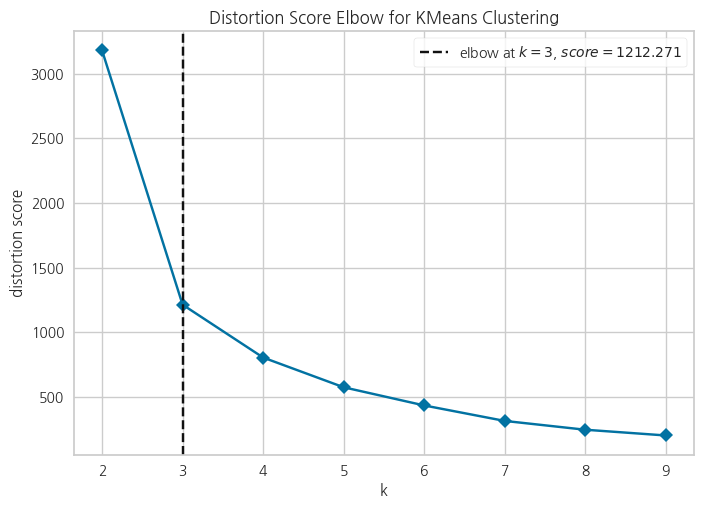

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
scaler = RobustScaler()
x = scaler.fit_transform(x)
x = pd.DataFrame(x)

reducer = umap.UMAP(random_state = 42)
umap_result = reducer.fit_transform(x)

model = KMeans()

elbowvisualizer = KElbowVisualizer(model, k = (2, 10), metrix = 'silhouette', timings = False)

elbowvisualizer.fit(umap_result)
elbowvisualizer.show()

In [ ]:
kmeans = KMeans(n_clusters = 3, random_state = 42)
kmeans.fit(umap_result)
km_labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


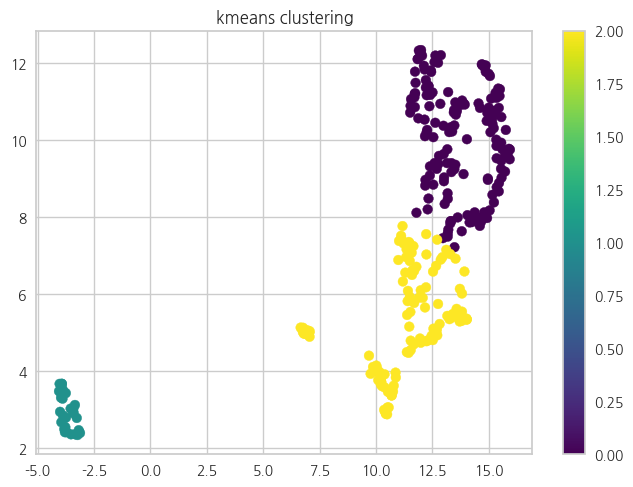

In [ ]:
plt.scatter(umap_result[:, 0], umap_result[:, 1], c = km_labels, cmap = 'viridis')
plt.colorbar()
plt.title('kmeans clustering')
plt.show()

In [ ]:
umap_km = pd.DataFrame(umap_result, columns=['UMAP Dimension{}'.format(i+1) for i in range(umap_result.shape[1])])

umap_km['Cluster'] = km_labels

after_cluster = pd.concat([table_clustered, umap_km['Cluster']], axis =1)

In [ ]:
after_cluster.groupby('Cluster').mean()

<ipython-input-202-b0063e0855f9>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  after_cluster.groupby('Cluster').mean()


,시청률,mean of searchs,mean of shops
Cluster,,,
0,3.341432,8.844709,-0.795621
1,4.908897,10.515058,-6.000000
2,9.322449,34.037794,-0.227393


In [ ]:
after_cluster

,작품명,시청률,mean of searchs,mean of shops,Cluster
0,(아는 건 별로 없지만) 가족입니다,4.177688,10.642215,-1.005055,0
1,18 어게인,2.724813,26.267921,0.133640,2
2,365: 운명을 거스르는 1년,4.329167,16.947858,-1.490012,0
3,"60일, 지정생존자",4.464313,16.260703,-1.953884,0
4,99억의 여자,8.953125,19.252340,0.959968,2
...,...,...,...,...,...
304,화양연화,4.274312,16.137134,0.989865,2
305,환혼,6.676150,32.508052,-2.358842,2
306,환혼 빛과 그림자,7.838500,6.038074,-2.376572,0
307,황금정원,7.411667,4.309082,0.288371,0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

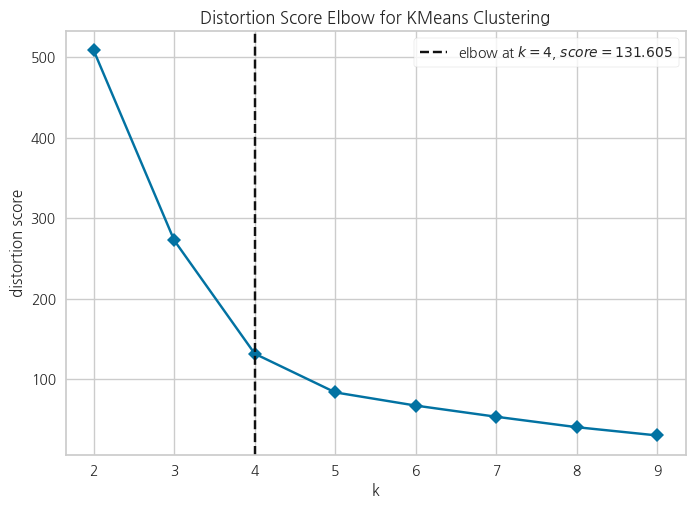

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
k = after_cluster[after_cluster['Cluster'] == 2].reset_index(drop = True)

x = k.copy().drop(['작품명', 'Cluster'], axis = 1)
scaler = RobustScaler()
x = scaler.fit_transform(x)
x = pd.DataFrame(x)
reducer = umap.UMAP(random_state = 42)
umap_result = reducer.fit_transform(x)
model = KMeans()

elbowvisualizer = KElbowVisualizer(model, k = (2, 10), metrix = 'silhouette', timings = False)

elbowvisualizer.fit(umap_result)
elbowvisualizer.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


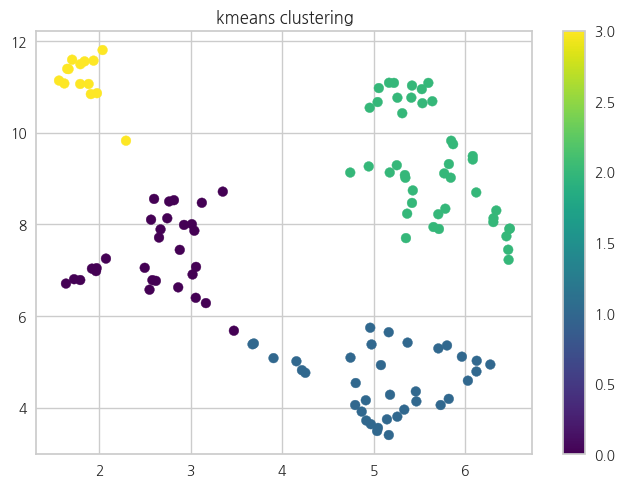

In [ ]:
kmeans = KMeans(n_clusters = 4, random_state = 42)
kmeans.fit(umap_result)
km_labels = kmeans.labels_
plt.scatter(umap_result[:, 0], umap_result[:, 1], c = km_labels, cmap = 'viridis')
plt.colorbar()
plt.title('kmeans clustering')
plt.show()


In [ ]:
umap_km = pd.DataFrame(umap_result, columns=['UMAP Dimension{}'.format(i+1) for i in range(umap_result.shape[1])])

umap_km['Cluster'] = km_labels

after_cluster = pd.concat([k.drop('Cluster', axis = 1), umap_km['Cluster']], axis =1)

In [ ]:
# 30 / 36 / 43 / 14
after_cluster.groupby('Cluster').mean()

<ipython-input-208-a82d10036809>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  after_cluster.groupby('Cluster').mean()


,시청률,mean of searchs,mean of shops
Cluster,,,
0,11.984429,68.525085,0.222142
1,5.282985,22.978235,0.830297
2,6.984357,26.281893,-1.460285
3,21.186683,12.397020,-0.123713


In [ ]:
features = pd.read_csv('/content/for_cluster.csv')
final = pd.merge(after_cluster[['작품명', 'Cluster']], features)
final = final.sort_values(by = 'Cluster').reset_index(drop = True)
def calculate_mode(x):
    return x.mode().iloc[0]
final['시간대'] = final['시간대'].str.replace('time', '').astype(int)
grouped = final.groupby('Cluster')

In [ ]:
col_genres = final.columns.tolist()[11:29]
col_actor = final.columns.tolist()[4:11]
col_meta = final.columns.tolist()[29:]
col_ott = final.columns.tolist()[2:4]
# 2: ott, 3:시간대, 4~10 : 배우등급, 11~28 : 장르, 29: 회차, 30~36: 요일

In [ ]:
target = col_ott
print(grouped.agg(calculate_mode)[target])
print(grouped.mean()[target].round(2))
print(grouped.std()[target].round(2))

         ott  시간대
Cluster          
0          1    3
1          0    4
2          0    4
3          0    2
          ott   시간대
Cluster            
0        0.53  3.50
1        0.31  3.39
2        0.35  3.53
3        0.07  2.07
          ott   시간대
Cluster            
0        0.51  0.51
1        0.47  0.73
2        0.48  0.59
3        0.27  0.92


<ipython-input-212-2fc29d9aa8ac>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(grouped.mean()[target].round(2))
<ipython-input-212-2fc29d9aa8ac>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(grouped.std()[target].round(2))


In [ ]:
# 0은 바이럴 집중, 1은 쇼핑 집중, 2는 기피해야, 3은 시청률 집중
# ott에서는, 0은 시간대3, 1은 시간대34, 2는 시간대34, 3은 시간대2 // 3은 ott 거의 이용 안함
# 메타에서는. 0은 금토/토일, 1은 수목, 2는 금, 3은 평일
# 0은 톱스타 적극 기용, 1과 2는 중급 배우(1~) 적극 기용. 1과 3은 0급 배우 기용
# 1을 제외하면 나머지는 멜로, 그런데 3은 추리. 시청률 때문
# 0은 멜로+청춘+스릴러+메디컬, 1은 오피스/정치, 3은 코미디+휴머니즘+막장, 2는 사극+SF+법정+판타지+액션

# 종료